In [1]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from parsing_and_evaluation import parse_and_evaluate_boolq, parse_and_evaluate_trivia

## Parse boolQ output

In [2]:
import pandas as pd
from parsing_and_evaluation import parse_and_evaluate_boolq  # Adjust the import based on your project structure

# Example of using modularized parsing and evaluation on a BoolQ file
# Make sure to use the correct file path
try:
    # Use the same file path as in the first cell
    results_df_boolq = pd.read_csv("output/llm_confidence_elicitation/batch_1000_llama_v2/boolq_verbalized_confidence_llama_batch_1000_llama_boolq_v2.csv")
    results_df_boolq = parse_and_evaluate_boolq(results_df_boolq)
    
    print("Results from modularized BoolQ parsing:")
    print(f"Total samples: {len(results_df_boolq)}")
    print("Columns:", results_df_boolq.columns)
    print(f"Valid parsed answers: {results_df_boolq['parsed_answer'].notna().sum()}")
    print(f"Valid confidences: {results_df_boolq['parsed_confidence'].notna().sum()}")
    print(f"Accuracy: {results_df_boolq['is_correct'].mean():.3f}")
except FileNotFoundError as e:
    print(f"File not found: {e}")
    print("Please check the file path and make sure the file exists.")

Results from modularized BoolQ parsing:
Total samples: 1000
Columns: Index(['question', 'title', 'answer', 'passage', 'context', 'prompt',
       'model_output', 'parsed_answer', 'parsed_confidence', 'is_correct'],
      dtype='object')
Valid parsed answers: 860
Valid confidences: 881
Accuracy: 0.666


In [3]:
results_df_boolq

,question,title,answer,passage,context,prompt,model_output,parsed_answer,parsed_confidence,is_correct
0,is systemic functional grammar a contemporary ...,Systemic functional grammar,True,Systemic functional grammar (SFG) is a form of...,Systemic functional grammar (SFG) is a form of...,You are a reading comprehension assistant. Giv...,"? \r\n\r\n{""answer"": ""True"", ""confidence"": 100}",True,100.0,True
1,is season 7 the final season of true blood,True Blood (season 7),True,The seventh and final season of the HBO supern...,The seventh and final season of the HBO supern...,You are a reading comprehension assistant. Giv...,"? {""answer"": ""True"", ""confidence"": 100}",True,100.0,True
2,are there any of the temptations still living,Otis Williams,True,Williams is best known as the founder and last...,Williams is best known as the founder and last...,You are a reading comprehension assistant. Giv...,"? Answer: True, 99.99% confidence\r\nConfidenc...",True,99.0,True
3,does shaving your head make lice go away,Treatment of human head lice,True,Shaving the head or cutting the hair extremely...,Shaving the head or cutting the hair extremely...,You are a reading comprehension assistant. Giv...,"?\r\n{""answer"": ""True"", ""confidence"": 100}",True,100.0,True
4,does a turtle's shell grow with them,Turtle shell,True,The carapacial ridge has been found to play an...,The carapacial ridge has been found to play an...,You are a reading comprehension assistant. Giv...,"? \r\n\r\n{""answer"": ""True"", ""confidence"": 90}...",True,90.0,True
...,...,...,...,...,...,...,...,...,...,...
995,will there be a new season of venture brothers,The Venture Bros.,True,Jackson Publick confirmed on Twitter that Seas...,Jackson Publick confirmed on Twitter that Seas...,You are a reading comprehension assistant. Giv...,in 2019?,None,NaN,NaN
996,are the isles of scilly part of great britain,Isles of Scilly,True,"Politically, the islands are part of England, ...","Politically, the islands are part of England, ...",You are a reading comprehension assistant. Giv...,"? \r\nAnswer: {""answer"": ""True"", ""confidence"":...",True,100.0,True
997,is there a movie based on the book number the ...,Number the Stars,False,"In September 2017, actor Sean Astin announced ...","In September 2017, actor Sean Astin announced ...",You are a reading comprehension assistant. Giv...,align?,None,NaN,NaN
998,does a point guard have to be tall,Point guard,False,Among the taller players who have enjoyed succ...,Among the taller players who have enjoyed succ...,You are a reading comprehension assistant. Giv...,"to be successful in the NBA? \r\n{""answer"": ""F...",False,100.0,True


In [4]:
# Convert boolean answer to string for comparison
results_df_boolq["answer"] == results_df_boolq["parsed_answer"].astype(bool)

0       True
1       True
2       True
3       True
4       True
       ...  
995    False
996     True
997     True
998    False
999     True
Length: 1000, dtype: bool

In [5]:
results_df_boolq["parsed_answer"].value_counts()

parsed_answer
True     660
False    200
Name: count, dtype: int64

In [6]:
results_df_boolq["parsed_confidence"].value_counts()

parsed_confidence
100.00    485
90.00     235
80.00     110
0.00       18
50.00      15
99.00       8
95.00       4
60.00       2
75.00       1
20.00       1
70.00       1
0.25        1
Name: count, dtype: int64

In [7]:
df_valid_boolq = results_df_boolq.dropna(subset=["parsed_answer", "parsed_confidence"])
df_valid_boolq.shape

(857, 10)

In [8]:
import numpy as np

# Create df_cm_valid and calculate average confidence for confusion matrix
df_cm_valid_boolq = df_valid_boolq.copy()

# Calculate average confidence for each (true_answer, predicted_answer) combination
avg_conf = df_cm_valid_boolq.groupby(['answer', 'parsed_answer'])['parsed_confidence'].mean().unstack(fill_value=np.nan)
print("Average confidence by (True Answer, Predicted Answer):")
print(avg_conf)

Average confidence by (True Answer, Predicted Answer):
parsed_answer      False       True
answer                             
False          79.223361  95.552381
True           81.883117  95.203125


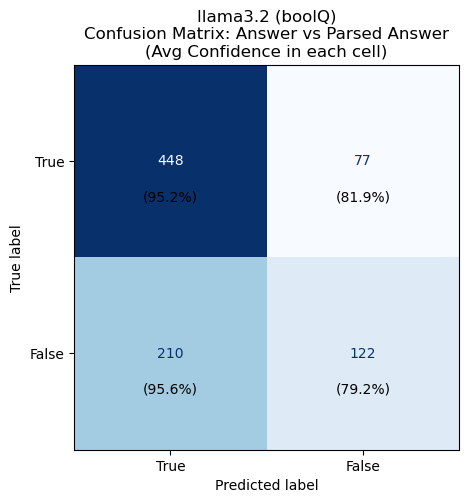

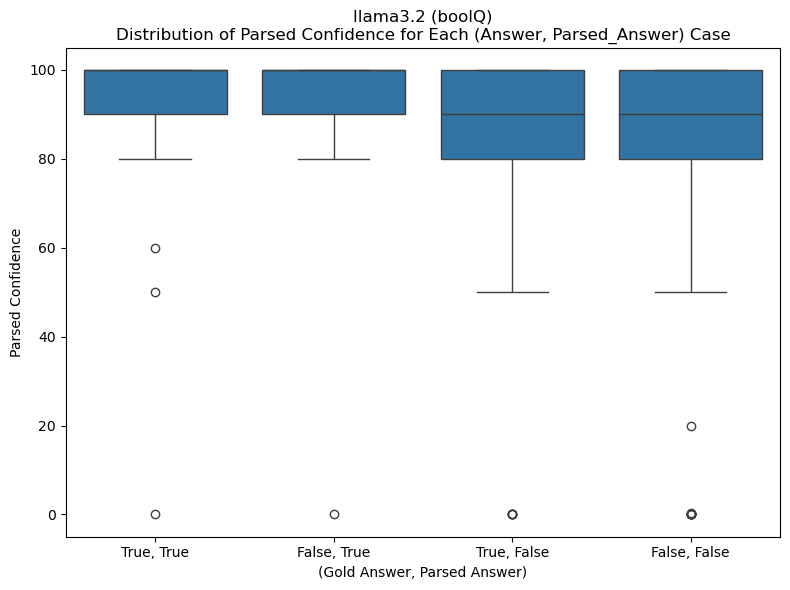

In [9]:
# Confusion matrix with average confidence annotation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import seaborn as sns

labels = ["True", "False"]
cm = confusion_matrix(df_cm_valid_boolq["answer"].astype(str), df_cm_valid_boolq["parsed_answer"], labels=labels)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=False)

# Annotate with average confidence in brackets, % and a little lower
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        # Convert string labels to boolean for indexing avg_conf
        true_bool = True if true_label == "True" else False
        pred_bool = True if pred_label == "True" else False
        
        # Hard-code the indexing based on position
        try:
            if i == 0 and j == 0:  # True, True
                avg = avg_conf.iloc[1, 1]  # True row, True column
            elif i == 0 and j == 1:  # True, False
                avg = avg_conf.iloc[1, 0]  # True row, False column
            elif i == 1 and j == 0:  # False, True
                avg = avg_conf.iloc[0, 1]  # False row, True column
            else:  # False, False
                avg = avg_conf.iloc[0, 0]  # False row, False column
        except:
            avg = np.nan
            
        # Place confidence a bit lower (y+0.15)
        if not np.isnan(avg):
            ax.text(j, i + 0.15, f"({avg:.1f}%)", va='top', ha='center', color='black', fontsize=10)

plt.title("llama3.2 (boolQ)\nConfusion Matrix: Answer vs Parsed Answer\n(Avg Confidence in each cell)")
plt.savefig("figures/metrics/confidence_elicitation/confusion_matrix_answer_vs_parsed_answer.png")
plt.show()

# Distribution of confidence for all 4 cases
# Create a case column for the boxplot
df_cm_valid_boolq["case"] = df_cm_valid_boolq["answer"].astype(str) + ", " + df_cm_valid_boolq["parsed_answer"]

plt.figure(figsize=(8, 6))
sns.boxplot(x="case", y="parsed_confidence", data=df_cm_valid_boolq)
plt.title("llama3.2 (boolQ)\nDistribution of Parsed Confidence for Each (Answer, Parsed_Answer) Case")
plt.xlabel("(Gold Answer, Parsed Answer)")
plt.ylabel("Parsed Confidence")
plt.tight_layout()
plt.savefig("figures/metrics/confidence_elicitation/parsed_confidence_distribution.png")
plt.show()


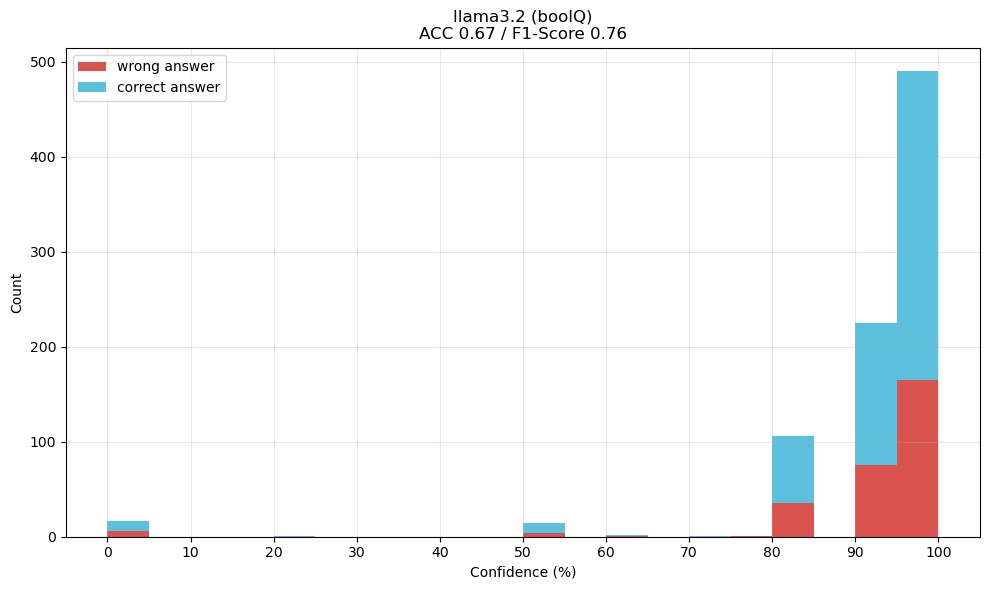

In [10]:
# Calculate f1-score
from sklearn.metrics import f1_score as sklearn_f1_score

f1_val = sklearn_f1_score(df_cm_valid_boolq["answer"].astype(str), df_cm_valid_boolq["parsed_answer"], average="binary", pos_label="True")

# Create more bins with smaller intervals
bins = np.arange(0, 101, 5)  # 5% intervals from 0 to 100

# Use df_cm_valid to define correct and wrong
correct = df_cm_valid_boolq[df_cm_valid_boolq["answer"].astype(str) == df_cm_valid_boolq["parsed_answer"]]["parsed_confidence"]
wrong = df_cm_valid_boolq[df_cm_valid_boolq["answer"].astype(str) != df_cm_valid_boolq["parsed_answer"]]["parsed_confidence"]

plt.figure(figsize=(10, 6))
plt.hist([wrong, correct], bins=bins, stacked=True, color=["#d9534f", "#5bc0de"], label=["wrong answer", "correct answer"])

plt.xlabel("Confidence (%)")
plt.ylabel("Count")
acc = (df_cm_valid_boolq["answer"].astype(str) == df_cm_valid_boolq["parsed_answer"]).mean()

# Title with ACC and F1-Score
plt.title("llama3.2 (boolQ)\nACC {:.2f} / F1-Score {:.2f}".format(acc, f1_val))
plt.legend(loc="upper left", frameon=True)
plt.xticks(bins[::2])  # Show every other bin label to avoid crowding
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("figures/metrics/confidence_elicitation/confidence_distribution_llama3.2.png", dpi=150)
plt.show()

C:\Users\Chris\AppData\Local\Temp\ipykernel_27604\497392664.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calib = df_cm_valid_boolq.groupby("conf_bin").agg(


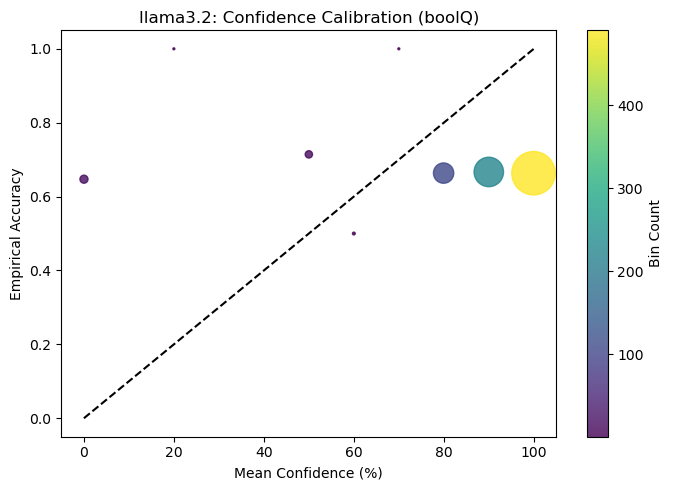

In [11]:
# Confidence calibration plot for llama3.2

# Bin confidence scores into intervals of 10, ensuring 100% is included
conf_bins = np.arange(0, 101, 10)  # Changed to 101 to include 100
df_cm_valid_boolq["conf_bin"] = pd.cut(df_cm_valid_boolq["parsed_confidence"], bins=conf_bins, right=True, include_lowest=True)

# Calculate mean confidence and empirical accuracy for each bin
calib = df_cm_valid_boolq.groupby("conf_bin").agg(
    mean_conf=("parsed_confidence", "mean"),
    accuracy=("answer", lambda x: (x.astype(str) == df_cm_valid_boolq.loc[x.index, "parsed_answer"]).mean()),
    count=("parsed_confidence", "count")
).dropna()

plt.figure(figsize=(7, 5))
plt.plot([0, 100], [0, 1], "k--", label="Perfect Calibration")
plt.scatter(calib["mean_conf"], calib["accuracy"], s=calib["count"]*2, c=calib["count"], cmap="viridis", alpha=0.8)
plt.xlabel("Mean Confidence (%)")
plt.ylabel("Empirical Accuracy")
plt.title("llama3.2: Confidence Calibration (boolQ)")
plt.colorbar(label="Bin Count")
plt.tight_layout()
plt.savefig("figures/metrics/confidence_elicitation/confidence_calibration_llama3.2.png")
plt.show()

## Parse TriviaQA output

In [12]:
from parsing_and_evaluation import parse_and_evaluate_trivia, normalize_trivia_answer, parse_trivia_output, evaluate_trivia_answer

# Example usage for TriviaQA
# Load TriviaQA data (adjust filepath as needed)
df_trivia = pd.read_csv("output/llm_confidence_elicitation/batch_1000_llama_v2/trivia_verbalized_confidence_llama_batch_1000_llama_trivia_squad.csv")

# Parse and evaluate using the modularized function from parsing_and_evaluation.py
df_trivia = parse_and_evaluate_trivia(df_trivia)

# Display results
print("TriviaQA Results:")
print(f"Total samples: {len(df_trivia)}")
print(f"Valid parsed answers: {df_trivia['parsed_answer'].notna().sum()}")
print(f"Valid confidences: {df_trivia['parsed_confidence'].notna().sum()}")
print(f"Accuracy: {df_trivia['is_correct'].mean():.3f}")

# Show first few rows to verify parsing
print("\nFirst few parsed results:")
print(df_trivia[['parsed_answer', 'parsed_confidence', 'is_correct']].head())

# # Example of testing the parser on sample outputs
# test_outputs = [
#     '{"answer": "Paris", "confidence": 95}',
#     'Answer: The Beatles\nConfidence: 88',
#     'The answer is William Shakespeare.',
#     'Paris, France',
#     '?'
# ]

# print("Testing TriviaQA parser:")
# for i, output in enumerate(test_outputs):
#     result = parse_trivia_output(output)
#     print(f"Output {i+1}: {output}")
#     print(f"  Parsed: {result}")
#     print()

TriviaQA Results:
Total samples: 1000
Valid parsed answers: 999
Valid confidences: 933
Accuracy: 0.277

First few parsed results:
    parsed_answer  parsed_confidence  is_correct
0             1/0                0.0       False
1  the george inn               90.0       False
2      the goring               80.0       False
3       greyhound               80.0        True
4         blondin               50.0       False


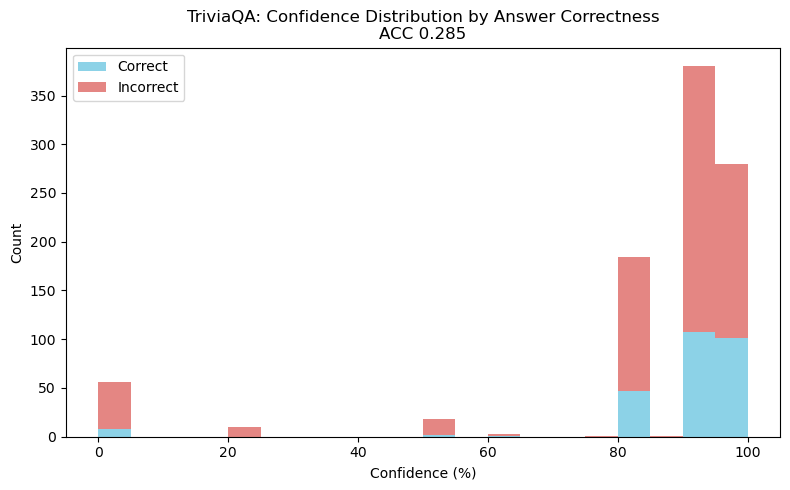

C:\Users\Chris\AppData\Local\Temp\ipykernel_27604\4198458173.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_correct", y="parsed_confidence", data=df_trivia_valid, palette=["#d9534f", "#5bc0de"])


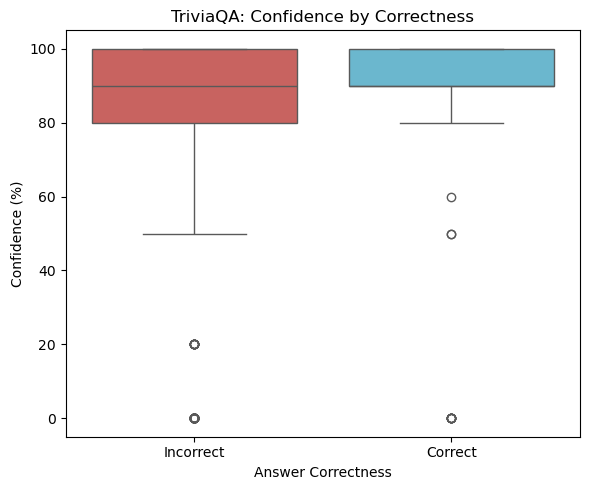

C:\Users\Chris\AppData\Local\Temp\ipykernel_27604\4198458173.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trivia_valid["conf_bin"] = pd.cut(df_trivia_valid["parsed_confidence"], bins=conf_bins, right=False)
C:\Users\Chris\AppData\Local\Temp\ipykernel_27604\4198458173.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calib = df_trivia_valid.groupby("conf_bin").agg(


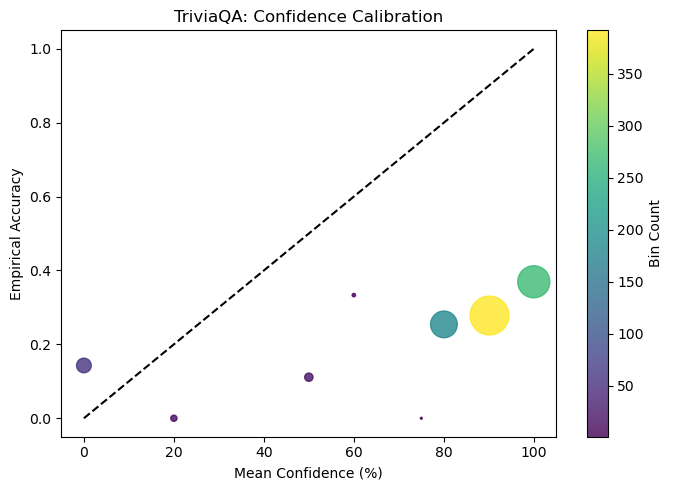

In [13]:
import seaborn as sns
import numpy as np
import os

import matplotlib.pyplot as plt

# Ensure output directory exists
os.makedirs("figures/metrics/confidence_elicitation", exist_ok=True)

# Filter valid rows for plotting
df_trivia_valid = df_trivia.dropna(subset=["parsed_confidence", "is_correct"])

# 1. Histogram: Confidence distribution for correct vs. incorrect answers
plt.figure(figsize=(8, 5))
bins = np.arange(0, 105, 5)
plt.hist(
    [df_trivia_valid[df_trivia_valid["is_correct"]]["parsed_confidence"],
     df_trivia_valid[~df_trivia_valid["is_correct"]]["parsed_confidence"]],
    bins=bins,
    label=["Correct", "Incorrect"],
    color=["#5bc0de", "#d9534f"],
    alpha=0.7,
    stacked=True
)
plt.xlabel("Confidence (%)")
plt.ylabel("Count")
plt.title(f"TriviaQA: Confidence Distribution by Answer Correctness\nACC {df_trivia_valid['is_correct'].mean():.3f}")
plt.legend()
plt.tight_layout()
plt.savefig("figures/metrics/confidence_elicitation/trivia_confidence_hist.png")
plt.show()

# 2. Boxplot: Confidence by correctness
plt.figure(figsize=(6, 5))
sns.boxplot(x="is_correct", y="parsed_confidence", data=df_trivia_valid, palette=["#d9534f", "#5bc0de"])
plt.xticks([0, 1], ["Incorrect", "Correct"])
plt.xlabel("Answer Correctness")
plt.ylabel("Confidence (%)")
plt.title("TriviaQA: Confidence by Correctness")
plt.tight_layout()
plt.savefig("figures/metrics/confidence_elicitation/trivia_confidence_boxplot.png")
plt.show()
# 3. Calibration plot: Confidence bins vs. empirical accuracy
conf_bins = np.arange(0, 111, 10)  # Changed to 111 to include 100%
df_trivia_valid["conf_bin"] = pd.cut(df_trivia_valid["parsed_confidence"], bins=conf_bins, right=False)
calib = df_trivia_valid.groupby("conf_bin").agg(
    mean_conf=("parsed_confidence", "mean"),
    accuracy=("is_correct", "mean"),
    count=("is_correct", "count")
).dropna()

plt.figure(figsize=(7, 5))
plt.plot([0, 100], [0, 1], "k--", label="Perfect Calibration")
plt.scatter(calib["mean_conf"], calib["accuracy"], s=calib["count"]*2, c=calib["count"], cmap="viridis", alpha=0.8)
plt.xlabel("Mean Confidence (%)")
plt.ylabel("Empirical Accuracy")
plt.title("TriviaQA: Confidence Calibration")
plt.colorbar(label="Bin Count")
plt.tight_layout()
plt.savefig("figures/metrics/confidence_elicitation/trivia_confidence_calibration.png")
plt.show()



=== Llama TriviaQA Analysis ===
Total samples: 1000
Valid results: 933 (93.3%)
Accuracy: 0.285
Average confidence: 83.9


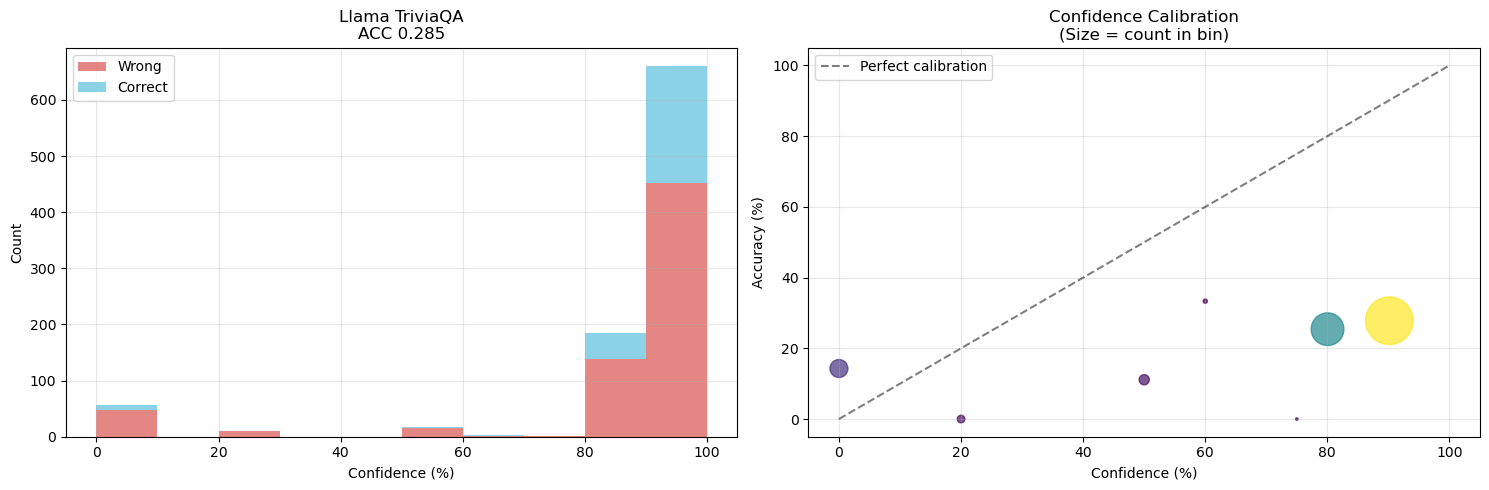


=== Sample Results ===
Correct predictions:
Q: Which US bus company was founded in Minnesota in 1914?...
Gold: ['Greyhound Neon', 'greyhound lines', 'Greyhound México', 'Greyhound Buses', 'Greyhound Lines Inc.', 'Greyhound Lines, Inc.', 'greyhound méxico', 'YO! Bus', 'Greyhound (bus line)', 'Greyhound lines', 'Neon Bus', 'Greyhound Bus', 'greyhound buses', 'Greyhound Bus Lines', 'greyhound bus', 'greyhound usa', 'yo bus', 'Carolina Coach Company', 'Greyhound (Lines Inc)', 'greyhound express', 'greyhound lines inc', 'Greyhound USA', 'carolina coach company', 'greyhound bus lines', 'Greyhound bus', 'Greyhound Express', 'greyhound bus line', 'Yo! Bus', 'neon bus', 'greyhound neon', 'Greyhound Lines'] | Pred: greyhound | Conf: 80.0

Q: Which pop group did Zayn Malik leave in March 2015?...
Gold: ['One Chance to Dance', 'Directioner', 'directioners', 'ONE DIRECTION', '1D Day', 'directioner', 'One Direction', 'List of One Direction concert tours', '1direction', 'list of one direction concer

In [14]:
def analyze_trivia_results(df: pd.DataFrame, model_name: str = "Model"):
    """
    Analyze and visualize TriviaQA results with confidence calibration.
    Expects df to already have parsed_answer, parsed_confidence, and is_correct columns
    from the modularized parse_and_evaluate_trivia function.
    """
    # Filter valid results
    df_valid = df.dropna(subset=["parsed_answer", "parsed_confidence", "is_correct"])
    
    if len(df_valid) == 0:
        print("No valid results to analyze!")
        return
    
    print(f"\n=== {model_name} TriviaQA Analysis ===")
    print(f"Total samples: {len(df)}")
    print(f"Valid results: {len(df_valid)} ({len(df_valid)/len(df)*100:.1f}%)")
    print(f"Accuracy: {df_valid['is_correct'].mean():.3f}")
    print(f"Average confidence: {df_valid['parsed_confidence'].mean():.1f}")
    
    # Confidence distribution by correctness
    correct_conf = df_valid[df_valid['is_correct']]['parsed_confidence']
    wrong_conf = df_valid[~df_valid['is_correct']]['parsed_confidence']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Confidence histogram
    bins = np.arange(0, 101, 10)
    ax1.hist([wrong_conf, correct_conf], bins=bins, stacked=True, 
             color=["#d9534f", "#5bc0de"], label=["Wrong", "Correct"], alpha=0.7)
    ax1.set_xlabel("Confidence (%)")
    ax1.set_ylabel("Count")
    ax1.set_title(f"{model_name} TriviaQA\nACC {df_valid['is_correct'].mean():.3f}")
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Confidence vs accuracy calibration plot
    conf_bins = np.arange(0, 101, 10)
    bin_acc = []
    bin_conf = []
    bin_counts = []
    
    for i in range(len(conf_bins)-1):
        mask = (df_valid['parsed_confidence'] >= conf_bins[i]) & (df_valid['parsed_confidence'] < conf_bins[i+1])
        bin_data = df_valid[mask]
        if len(bin_data) > 0:
            bin_acc.append(bin_data['is_correct'].mean())
            bin_conf.append(bin_data['parsed_confidence'].mean())
            bin_counts.append(len(bin_data))
        else:
            bin_acc.append(0)
            bin_conf.append(conf_bins[i] + 5)
            bin_counts.append(0)
    
    # Plot calibration
    ax2.plot([0, 100], [0, 100], 'k--', alpha=0.5, label='Perfect calibration')
    scatter = ax2.scatter(bin_conf, [acc*100 for acc in bin_acc], 
                         s=[c*3 for c in bin_counts], alpha=0.7, c=bin_counts, cmap='viridis')
    ax2.set_xlabel("Confidence (%)")
    ax2.set_ylabel("Accuracy (%)")
    ax2.set_title("Confidence Calibration\n(Size = count in bin)")
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f"figures/metrics/confidence_elicitation/trivia_{model_name.lower()}_analysis.png", dpi=150)
    plt.show()
    
    # Show some examples
    print("\n=== Sample Results ===")
    print("Correct predictions:")
    correct_samples = df_valid[df_valid['is_correct']].head(3)
    for _, row in correct_samples.iterrows():
        print(f"Q: {row.get('question', 'N/A')[:80]}...")
        print(f"Gold: {row.get('answers', 'N/A')} | Pred: {row['parsed_answer']} | Conf: {row['parsed_confidence']}")
        print()
    
    print("Incorrect predictions:")
    wrong_samples = df_valid[~df_valid['is_correct']].head(3)
    for _, row in wrong_samples.iterrows():
        print(f"Q: {row.get('question', 'N/A')[:80]}...")
        print(f"Gold: {row.get('answers', 'N/A')} | Pred: {row['parsed_answer']} | Conf: {row['parsed_confidence']}")
        print()

# Uncomment to run analysis:
analyze_trivia_results(df_trivia, "Llama")

## Parse SQuAD output

In [15]:
from parsing_and_evaluation import parse_and_evaluate_squad, normalize_squad_answer, parse_squad_output, evaluate_squad_answer

# Load SQuAD data (adjust filepath as needed)
try:
    df_squad = pd.read_csv("output/llm_confidence_elicitation/batch_1000_llama_v2/squad_verbalized_confidence_llama_batch_1000_llama_trivia_squad.csv")
    
    # Parse and evaluate using the modularized function from parsing_and_evaluation.py
    # Option 1: Keep unanswerable questions
    df_squad_all = parse_and_evaluate_squad(df_squad.copy(), remove_unanswerable=False)
    
    # Option 2: Remove unanswerable questions
    df_squad_answerable = parse_and_evaluate_squad(df_squad.copy(), remove_unanswerable=True)
    
    # Display results for both versions
    print("=== SQuAD Results (All Questions) ===")
    print(f"Total samples: {len(df_squad_all)}")
    print(f"Valid parsed answers: {df_squad_all['parsed_answer'].notna().sum()}")
    print(f"Valid confidences: {df_squad_all['parsed_confidence'].notna().sum()}")
    print(f"Accuracy: {df_squad_all['is_correct'].mean():.3f}")
    
    if 'is_impossible' in df_squad_all.columns:
        unanswerable_count = (df_squad_all['is_impossible'] == True).sum()
        print(f"Unanswerable questions: {unanswerable_count}")
    
    print("\n=== SQuAD Results (Answerable Questions Only) ===")
    print(f"Total samples: {len(df_squad_answerable)}")
    print(f"Valid parsed answers: {df_squad_answerable['parsed_answer'].notna().sum()}")
    print(f"Valid confidences: {df_squad_answerable['parsed_confidence'].notna().sum()}")
    print(f"Accuracy: {df_squad_answerable['is_correct'].mean():.3f}")
    
    # Show first few rows to verify parsing
    print("\nFirst few parsed results (all questions):")
    print(df_squad_all[['parsed_answer', 'parsed_confidence', 'is_correct']].head())
    
except FileNotFoundError as e:
    print(f"SQuAD file not found: {e}")
    print("Please check the file path. Expected file:")
    print("output/llm_confidence_elicitation/batch_1000_llama_v2/squad_verbalized_confidence_llama_batch_1000_llama_trivia_squad.csv")
except Exception as e:
    print(f"Error loading SQuAD data: {e}")
    
    # Create a demo with sample data if file not found
    print("\nCreating demo SQuAD analysis with sample data...")
    
    # Sample SQuAD data for demonstration
    sample_data = {
        'model_output': [
            '{"answer": "Paris", "confidence": 90}',
            'Answer: The Beatles\nConfidence: 85',
            '{"answer": "", "confidence": 95}',  # Unanswerable
            'Answer: William Shakespeare\nConfidence: 88'
        ],
        'answers': [
            "['Paris']",
            "['Beatles', 'The Beatles']", 
            "['']",  # Unanswerable
            "['William Shakespeare', 'Shakespeare']"
        ],
        'is_impossible': [False, False, True, False]
    }
    
    df_squad_demo = pd.DataFrame(sample_data)
    df_squad_demo_parsed = parse_and_evaluate_squad(df_squad_demo, remove_unanswerable=False)
    
    print("Demo SQuAD parsing results:")
    print(df_squad_demo_parsed[['model_output', 'parsed_answer', 'parsed_confidence', 'is_correct', 'is_impossible']])

Removed 362 unanswerable questions. 638 questions remaining.
=== SQuAD Results (All Questions) ===
Total samples: 1000
Valid parsed answers: 998
Valid confidences: 570
Accuracy: 0.429
Unanswerable questions: 362

=== SQuAD Results (Answerable Questions Only) ===
Total samples: 638
Valid parsed answers: 636
Valid confidences: 359
Accuracy: 0.672

First few parsed results (all questions):
                                       parsed_answer  parsed_confidence  \
0                                             the eu                NaN   
1                                          } wi-fi {                NaN   
2                       destroying enemy air defense               90.0   
3  failed in its main objective to find gold depo...                NaN   
4        a a mp3 file b a jpeg image c a png graphic                NaN   

   is_correct  
0       False  
1       False  
2       False  
3       False  
4       False  



=== All Questions Analysis ===
Valid samples: 570
Accuracy: 0.446
Average confidence: 88.7


C:\Users\Chris\AppData\Local\Temp\ipykernel_27604\1298722619.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_correct", y="parsed_confidence", data=df_squad_valid,
C:\Users\Chris\AppData\Local\Temp\ipykernel_27604\1298722619.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(["Incorrect", "Correct"])
C:\Users\Chris\AppData\Local\Temp\ipykernel_27604\1298722619.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_squad_valid["conf_bin"] = pd.cut(df_squad_valid["parsed_confidence"], 

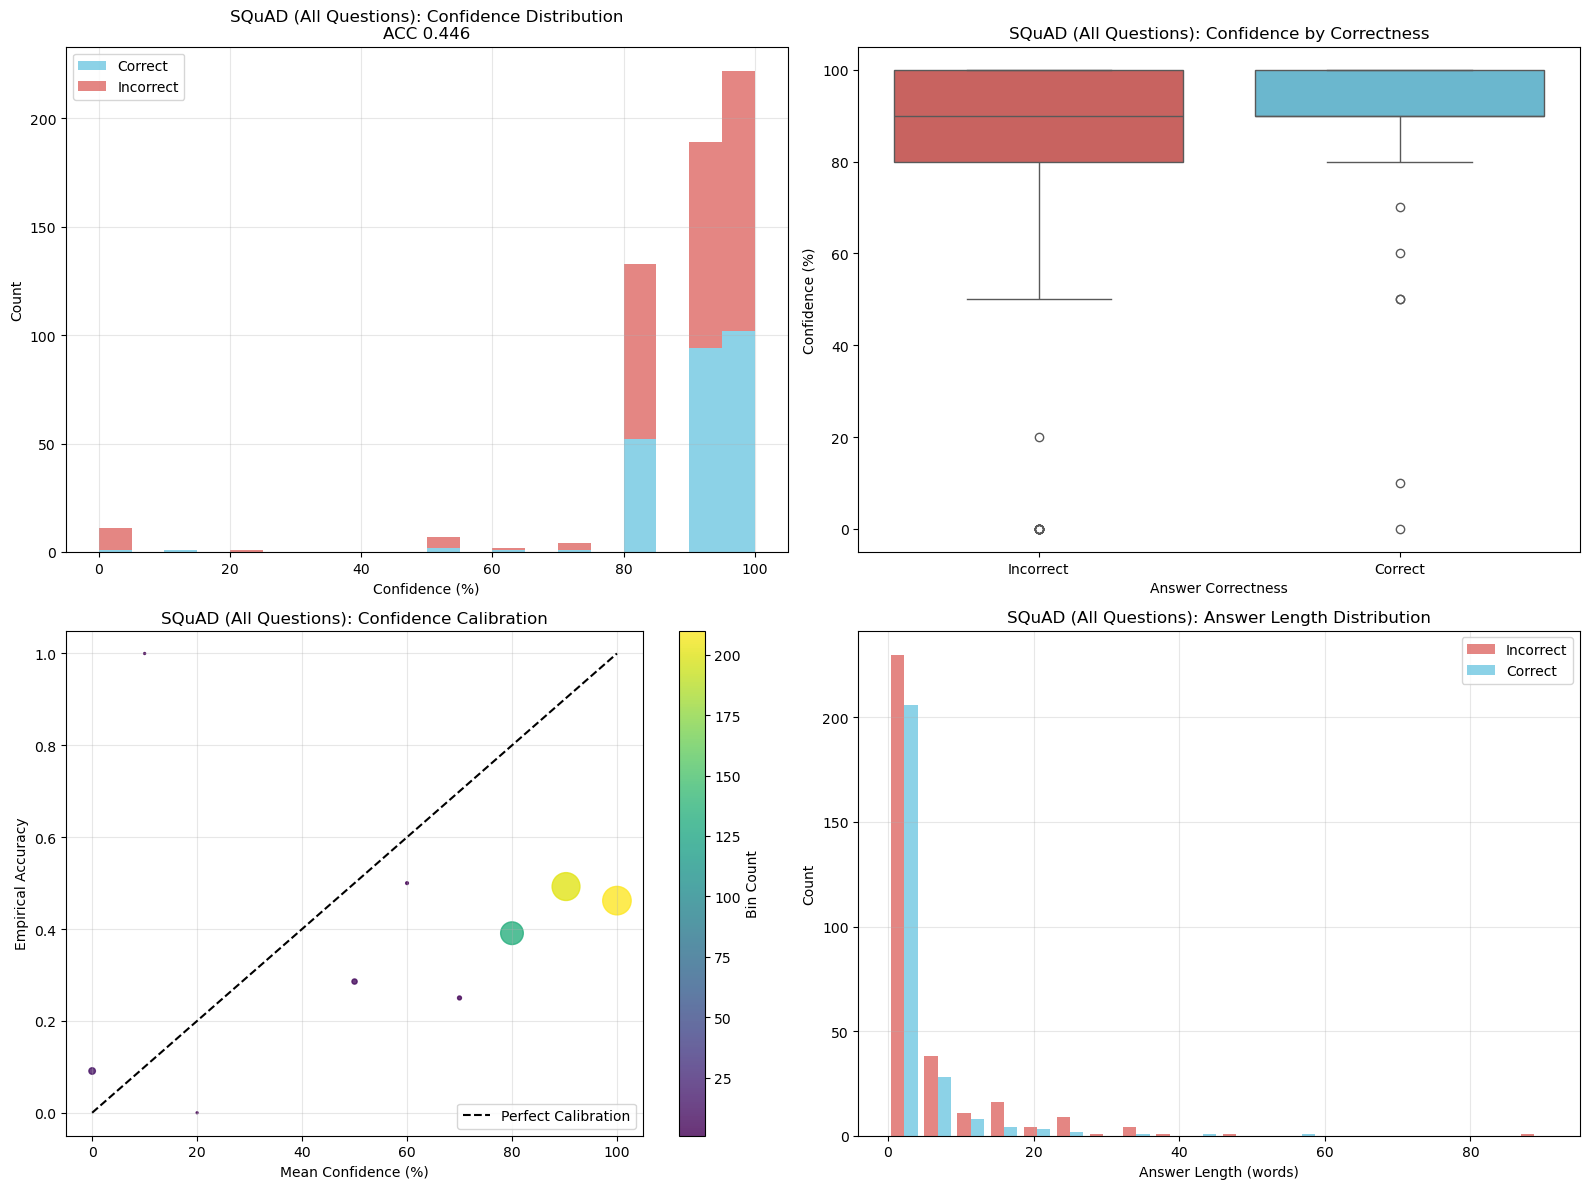


=== Sample All Questions Results ===
Correct predictions:
Q: What is the name of the Bungie Inc. founder who is also a university graduate?
Gold: ['Alex Seropian', 'Alex Seropian', 'Alex Seropian'] | Pred: 'alex seropian' | Conf: 100.0

Q: In 1863, why was Aboriginal population declining?
Gold: ['diseases, particularly smallpox, frontier violence and dispossession from their lands.'] | Pred: 'introduced diseases particularly smallpox frontier violence and dispossession from their lands' | Conf: 80.0

Q: What Mexican department store typically caters to high-end goods?
Gold: ['El Palacio de Hierro'] | Pred: 'el palacio de hierro' | Conf: 90.0

Incorrect predictions:
Q: What is one of the important functions of the OCA in dealing with attacks? 
Gold: ['suppression/destruction of enemy air defense'] | Pred: 'destroying enemy air defense' | Conf: 90.0

Q: What happened when Nicholas II was removed from power?
Gold: ['the Russian Provisional Government was established.'] | Pred: 'nicholas 

C:\Users\Chris\AppData\Local\Temp\ipykernel_27604\1298722619.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_correct", y="parsed_confidence", data=df_squad_valid,
C:\Users\Chris\AppData\Local\Temp\ipykernel_27604\1298722619.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(["Incorrect", "Correct"])
C:\Users\Chris\AppData\Local\Temp\ipykernel_27604\1298722619.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_squad_valid["conf_bin"] = pd.cut(df_squad_valid["parsed_confidence"], 

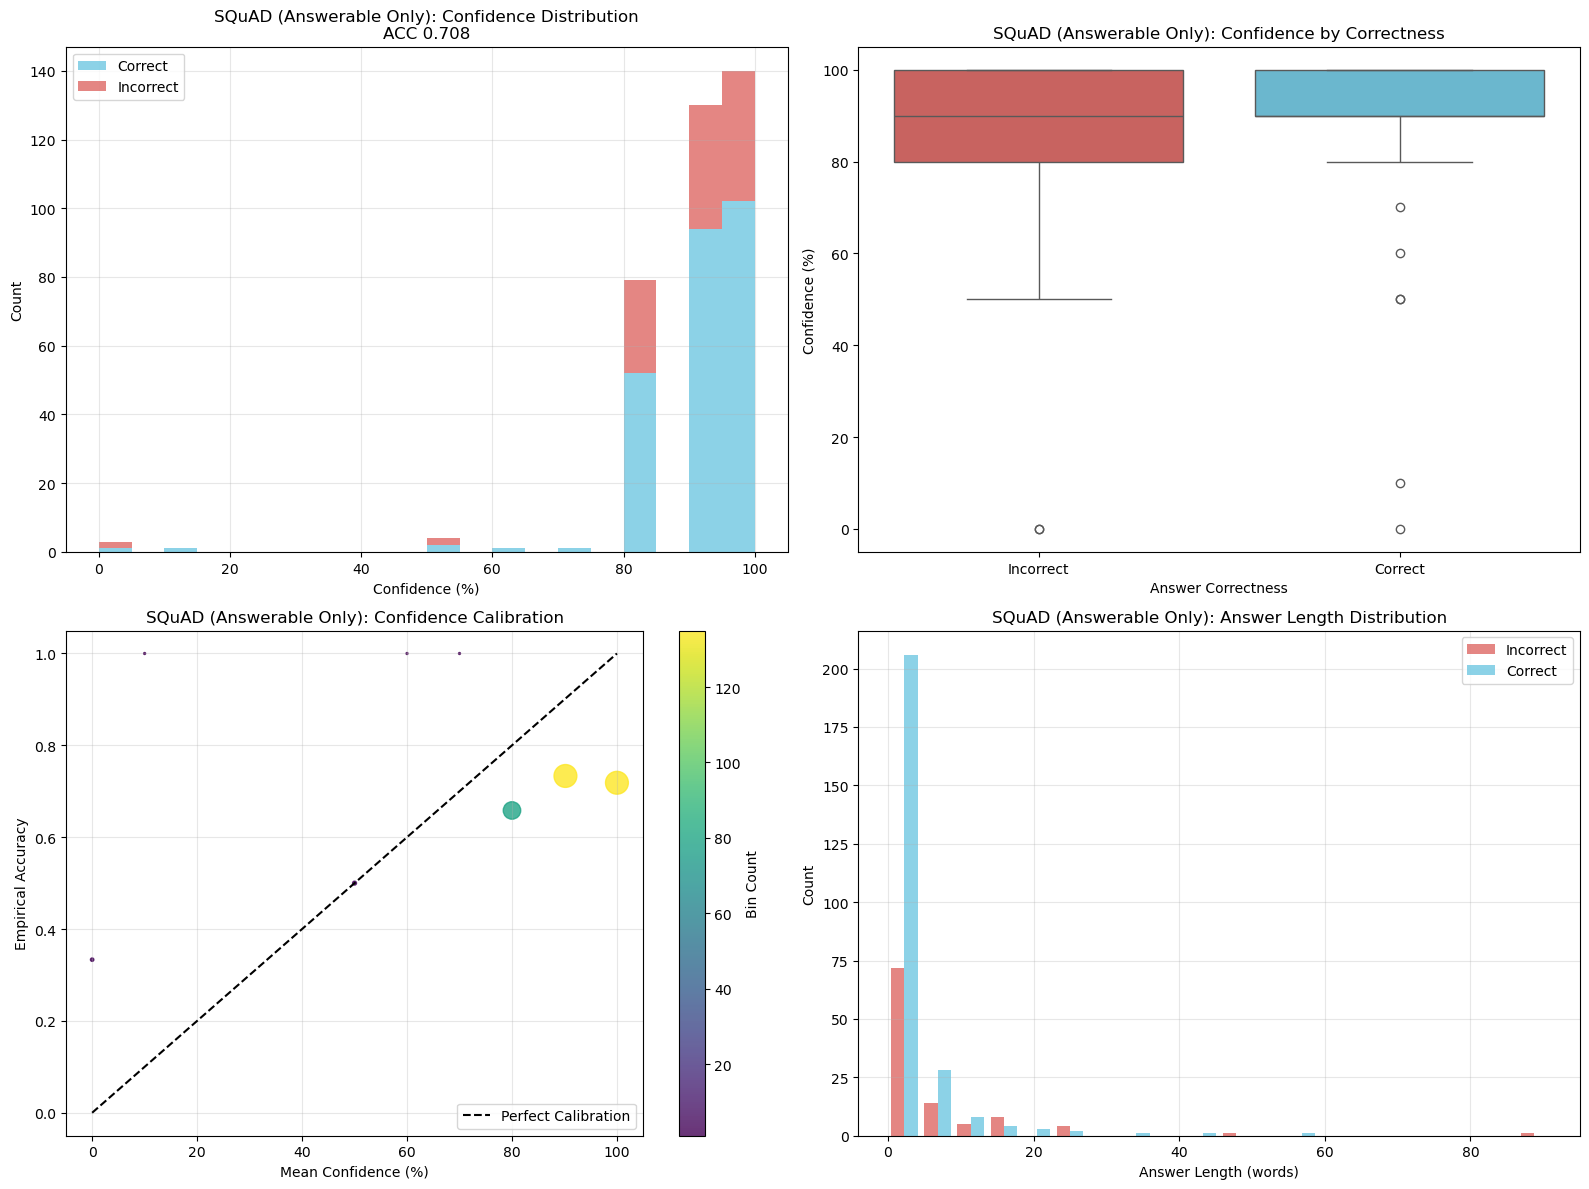


=== Sample Answerable Only Results ===
Correct predictions:
Q: What is the name of the Bungie Inc. founder who is also a university graduate?
Gold: ['Alex Seropian', 'Alex Seropian', 'Alex Seropian'] | Pred: 'alex seropian' | Conf: 100.0

Q: In 1863, why was Aboriginal population declining?
Gold: ['diseases, particularly smallpox, frontier violence and dispossession from their lands.'] | Pred: 'introduced diseases particularly smallpox frontier violence and dispossession from their lands' | Conf: 80.0

Q: What Mexican department store typically caters to high-end goods?
Gold: ['El Palacio de Hierro'] | Pred: 'el palacio de hierro' | Conf: 90.0

Incorrect predictions:
Q: What is one of the important functions of the OCA in dealing with attacks? 
Gold: ['suppression/destruction of enemy air defense'] | Pred: 'destroying enemy air defense' | Conf: 90.0

Q: What happened when Nicholas II was removed from power?
Gold: ['the Russian Provisional Government was established.'] | Pred: 'nichola

In [16]:
# SQuAD Analysis and Visualization
if 'df_squad_all' in locals():
    import seaborn as sns
    import numpy as np
    import os
    import matplotlib.pyplot as plt

    # Ensure output directory exists
    os.makedirs("figures/metrics/confidence_elicitation", exist_ok=True)
    
    # Analyze both versions (all questions vs answerable only)
    datasets = {
        'All Questions': df_squad_all,
        'Answerable Only': df_squad_answerable
    }
    
    for dataset_name, df_squad_current in datasets.items():
        print(f"\n=== {dataset_name} Analysis ===")
        
        # Filter valid rows for plotting
        df_squad_valid = df_squad_current.dropna(subset=["parsed_confidence", "is_correct"])
        
        if len(df_squad_valid) == 0:
            print(f"No valid results for {dataset_name}!")
            continue
            
        print(f"Valid samples: {len(df_squad_valid)}")
        print(f"Accuracy: {df_squad_valid['is_correct'].mean():.3f}")
        print(f"Average confidence: {df_squad_valid['parsed_confidence'].mean():.1f}")
        
        # Create visualizations
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Histogram: Confidence distribution for correct vs. incorrect answers
        bins = np.arange(0, 105, 5)
        ax1.hist(
            [df_squad_valid[df_squad_valid["is_correct"]]["parsed_confidence"],
             df_squad_valid[~df_squad_valid["is_correct"]]["parsed_confidence"]],
            bins=bins,
            label=["Correct", "Incorrect"],
            color=["#5bc0de", "#d9534f"],
            alpha=0.7,
            stacked=True
        )
        ax1.set_xlabel("Confidence (%)")
        ax1.set_ylabel("Count")
        ax1.set_title(f"SQuAD ({dataset_name}): Confidence Distribution\nACC {df_squad_valid['is_correct'].mean():.3f}")
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. Boxplot: Confidence by correctness
        sns.boxplot(x="is_correct", y="parsed_confidence", data=df_squad_valid, 
                   palette=["#d9534f", "#5bc0de"], ax=ax2)
        ax2.set_xticklabels(["Incorrect", "Correct"])
        ax2.set_xlabel("Answer Correctness")
        ax2.set_ylabel("Confidence (%)")
        ax2.set_title(f"SQuAD ({dataset_name}): Confidence by Correctness")
        
        # 3. Calibration plot: Confidence bins vs. empirical accuracy
        conf_bins = np.arange(0, 111, 10)
        df_squad_valid["conf_bin"] = pd.cut(df_squad_valid["parsed_confidence"], bins=conf_bins, right=False)
        calib = df_squad_valid.groupby("conf_bin").agg(
            mean_conf=("parsed_confidence", "mean"),
            accuracy=("is_correct", "mean"),
            count=("is_correct", "count")
        ).dropna()
        
        ax3.plot([0, 100], [0, 1], "k--", label="Perfect Calibration")
        scatter = ax3.scatter(calib["mean_conf"], calib["accuracy"], 
                            s=calib["count"]*2, c=calib["count"], cmap="viridis", alpha=0.8)
        ax3.set_xlabel("Mean Confidence (%)")
        ax3.set_ylabel("Empirical Accuracy")
        ax3.set_title(f"SQuAD ({dataset_name}): Confidence Calibration")
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=ax3, label="Bin Count")
        
        # 4. Answer length distribution
        if 'parsed_answer' in df_squad_valid.columns:
            answer_lengths = df_squad_valid['parsed_answer'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
            correct_lengths = answer_lengths[df_squad_valid['is_correct']]
            incorrect_lengths = answer_lengths[~df_squad_valid['is_correct']]
            
            ax4.hist([incorrect_lengths, correct_lengths], bins=20, alpha=0.7, 
                    label=['Incorrect', 'Correct'], color=['#d9534f', '#5bc0de'])
            ax4.set_xlabel("Answer Length (words)")
            ax4.set_ylabel("Count")
            ax4.set_title(f"SQuAD ({dataset_name}): Answer Length Distribution")
            ax4.legend()
            ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        # Save figure
        filename_suffix = "all" if "All" in dataset_name else "answerable"
        plt.savefig(f"figures/metrics/confidence_elicitation/squad_{filename_suffix}_analysis.png", dpi=150)
        plt.show()
        
        # Show some examples
        if len(df_squad_valid) > 0:
            print(f"\n=== Sample {dataset_name} Results ===")
            print("Correct predictions:")
            correct_samples = df_squad_valid[df_squad_valid['is_correct']].head(3)
            for _, row in correct_samples.iterrows():
                question = row.get('question', 'N/A')[:80] + "..." if len(str(row.get('question', ''))) > 80 else row.get('question', 'N/A')
                print(f"Q: {question}")
                print(f"Gold: {row.get('answers', 'N/A')} | Pred: '{row['parsed_answer']}' | Conf: {row['parsed_confidence']}")
                print()
            
            print("Incorrect predictions:")
            wrong_samples = df_squad_valid[~df_squad_valid['is_correct']].head(3)
            for _, row in wrong_samples.iterrows():
                question = row.get('question', 'N/A')[:80] + "..." if len(str(row.get('question', ''))) > 80 else row.get('question', 'N/A')
                print(f"Q: {question}")
                print(f"Gold: {row.get('answers', 'N/A')} | Pred: '{row['parsed_answer']}' | Conf: {row['parsed_confidence']}")
                print()

else:
    print("SQuAD data not loaded. Run the previous cell first.")

=== CROSS-DATASET PERFORMANCE COMPARISON ===

Performance Summary:
BoolQ           | ACC: 0.665 | Conf:  91.8 | Parse Rate: 0.857 | Samples: 857/1000
TriviaQA        | ACC: 0.285 | Conf:  83.9 | Parse Rate: 0.933 | Samples: 933/1000
SQuAD (All)     | ACC: 0.446 | Conf:  88.7 | Parse Rate: 0.569 | Samples: 569/1000
SQuAD (Answerable) | ACC: 0.709 | Conf:  90.1 | Parse Rate: 0.561 | Samples: 358/638


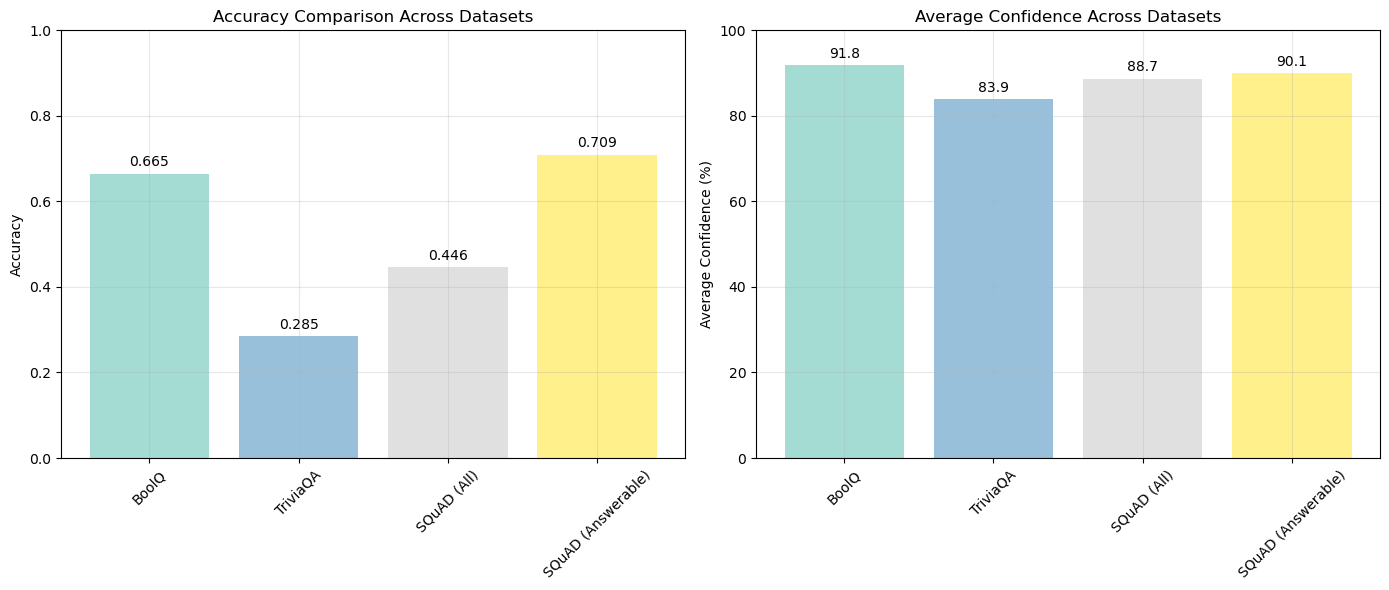


💡 Key Insights:
- Highest accuracy: SQuAD (Answerable) (0.709)
- Highest confidence: BoolQ (91.8%)
- Confidence-accuracy alignment:
  BoolQ          : 0.253 (lower is better)
  TriviaQA       : 0.554 (lower is better)
  SQuAD (All)    : 0.441 (lower is better)
  SQuAD (Answerable): 0.191 (lower is better)


In [17]:
# Cross-Dataset Comparison: BoolQ vs TriviaQA vs SQuAD
print("=== CROSS-DATASET PERFORMANCE COMPARISON ===")
print()

# Collect metrics from all datasets
comparison_data = []

# BoolQ (if available)
if 'results_df_boolq' in locals():
    boolq_valid = results_df_boolq.dropna(subset=["parsed_answer", "parsed_confidence", "is_correct"])
    comparison_data.append({
        'Dataset': 'BoolQ',
        'Total Samples': len(results_df_boolq),
        'Valid Samples': len(boolq_valid),
        'Accuracy': boolq_valid['is_correct'].mean(),
        'Avg Confidence': boolq_valid['parsed_confidence'].mean(),
        'Valid Parse Rate': len(boolq_valid) / len(results_df_boolq)
    })

# TriviaQA (if available)
if 'df_trivia' in locals():
    trivia_valid = df_trivia.dropna(subset=["parsed_answer", "parsed_confidence", "is_correct"])
    comparison_data.append({
        'Dataset': 'TriviaQA',
        'Total Samples': len(df_trivia),
        'Valid Samples': len(trivia_valid),
        'Accuracy': trivia_valid['is_correct'].mean(),
        'Avg Confidence': trivia_valid['parsed_confidence'].mean(),
        'Valid Parse Rate': len(trivia_valid) / len(df_trivia)
    })

# SQuAD All (if available)
if 'df_squad_all' in locals():
    squad_all_valid = df_squad_all.dropna(subset=["parsed_answer", "parsed_confidence", "is_correct"])
    comparison_data.append({
        'Dataset': 'SQuAD (All)',
        'Total Samples': len(df_squad_all),
        'Valid Samples': len(squad_all_valid),
        'Accuracy': squad_all_valid['is_correct'].mean(),
        'Avg Confidence': squad_all_valid['parsed_confidence'].mean(),
        'Valid Parse Rate': len(squad_all_valid) / len(df_squad_all)
    })

# SQuAD Answerable (if available)
if 'df_squad_answerable' in locals():
    squad_ans_valid = df_squad_answerable.dropna(subset=["parsed_answer", "parsed_confidence", "is_correct"])
    comparison_data.append({
        'Dataset': 'SQuAD (Answerable)',
        'Total Samples': len(df_squad_answerable),
        'Valid Samples': len(squad_ans_valid),
        'Accuracy': squad_ans_valid['is_correct'].mean(),
        'Avg Confidence': squad_ans_valid['parsed_confidence'].mean(),
        'Valid Parse Rate': len(squad_ans_valid) / len(df_squad_answerable)
    })

# Create comparison DataFrame
if comparison_data:
    df_comparison = pd.DataFrame(comparison_data)
    
    print("Performance Summary:")
    print("=" * 80)
    for _, row in df_comparison.iterrows():
        print(f"{row['Dataset']:15} | ACC: {row['Accuracy']:.3f} | "
              f"Conf: {row['Avg Confidence']:5.1f} | "
              f"Parse Rate: {row['Valid Parse Rate']:.3f} | "
              f"Samples: {row['Valid Samples']}/{row['Total Samples']}")
    
    # Visualization
    if len(comparison_data) > 1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Accuracy comparison
        datasets = df_comparison['Dataset']
        accuracies = df_comparison['Accuracy']
        colors = plt.cm.Set3(np.linspace(0, 1, len(datasets)))
        
        bars1 = ax1.bar(datasets, accuracies, color=colors, alpha=0.8)
        ax1.set_ylabel('Accuracy')
        ax1.set_title('Accuracy Comparison Across Datasets')
        ax1.set_ylim(0, 1)
        ax1.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, acc in zip(bars1, accuracies):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{acc:.3f}', ha='center', va='bottom')
        
        # Confidence comparison
        confidences = df_comparison['Avg Confidence']
        bars2 = ax2.bar(datasets, confidences, color=colors, alpha=0.8)
        ax2.set_ylabel('Average Confidence (%)')
        ax2.set_title('Average Confidence Across Datasets')
        ax2.set_ylim(0, 100)
        ax2.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, conf in zip(bars2, confidences):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{conf:.1f}', ha='center', va='bottom')
        
        # Rotate x-axis labels if needed
        for ax in [ax1, ax2]:
            ax.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.savefig("figures/metrics/confidence_elicitation/dataset_comparison.png", dpi=150)
        plt.show()
        
        print(f"\n💡 Key Insights:")
        best_acc_idx = df_comparison['Accuracy'].idxmax()
        best_conf_idx = df_comparison['Avg Confidence'].idxmax()
        print(f"- Highest accuracy: {df_comparison.loc[best_acc_idx, 'Dataset']} ({df_comparison.loc[best_acc_idx, 'Accuracy']:.3f})")
        print(f"- Highest confidence: {df_comparison.loc[best_conf_idx, 'Dataset']} ({df_comparison.loc[best_conf_idx, 'Avg Confidence']:.1f}%)")
        
        # Calculate confidence-accuracy alignment
        print("- Confidence-accuracy alignment:")
        for _, row in df_comparison.iterrows():
            alignment = abs(row['Accuracy'] - row['Avg Confidence']/100)
            print(f"  {row['Dataset']:15}: {alignment:.3f} (lower is better)")
    
else:
    print("No datasets available for comparison. Please run the parsing cells first.")

# Multiple Sampels per Answer

## BoolQ

In [18]:
import pandas as pd
from parsing_and_evaluation import parse_aggregate_evaluate_boolq_multi, parse_and_evaluate_boolq_multi, aggregate_confidence_boolq, evaluate_boolq_aggregated, normalize_boolq_multi

# ───────────────────────────────
# 0. Load Data
# ───────────────────────────────
df_boolq_multi = pd.read_csv("output/llm_confidence_elicitation/verbalized_confidence_multi_model/boolq_llama_k5_topk_500_full.csv")

# ───────────────────────────────
# Complete Pipeline: Parse, Aggregate, and Evaluate
# ───────────────────────────────
df_parsed_boolq_agg, df_agg_boolq_agg, eval_df_boolq_agg, acc_boolq_agg = parse_aggregate_evaluate_boolq_multi(df_boolq_multi, group_col="question_id")

print(f"✅ Multi-Sample BoolQ Results (Modularized):")
print(f"   - Total samples: {len(df_boolq_multi)}")
print(f"   - Unique questions: {df_boolq_multi['question_id'].nunique()}")
print(f"   - Valid parsed samples: {df_parsed_boolq_agg['parsed_answer'].notna().sum()}")
print(f"   - Aggregated accuracy: {acc:.2%}")

# Show first few results
print(f"\nFirst few aggregated results:")
eval_df_boolq_agg.head()


✅ Multi-Sample BoolQ Results (Modularized):
   - Total samples: 2500
   - Unique questions: 500
   - Valid parsed samples: 1957
   - Aggregated accuracy: 70.95%

First few aggregated results:


,question_id,agg_answer,agg_confidence,answer,answer_norm,is_correct
0,0,true,100.000000,True,true,True
1,1,true,100.000000,True,true,True
2,2,true,100.000000,True,true,True
3,3,true,100.000000,True,true,True
4,4,true,64.285714,True,true,True


In [19]:
# Alternative: Step-by-step usage of modularized functions
print("=== STEP-BY-STEP MULTI-SAMPLE BOOLQ PROCESSING ===")
print()

# Step 1: Parse individual outputs (if needed)
print("Step 1: Parsing individual model outputs...")
df_step1 = parse_and_evaluate_boolq_multi(df_boolq_multi.copy(), group_col="question_id")
print(f"   ✅ Parsed {df_step1['parsed_answer'].notna().sum()} valid answers")

# Step 2: Aggregate by confidence-weighted voting
print("\nStep 2: Aggregating with confidence-weighted voting...")
df_step2 = aggregate_confidence_boolq(df_step1, group_col="question_id")
print(f"   ✅ Aggregated {len(df_step2)} unique questions")
print(f"   - Answer distribution: {df_step2['agg_answer'].value_counts().to_dict()}")

# Step 3: Evaluate against ground truth
print("\nStep 3: Evaluating aggregated results...")
eval_step3, acc_step3 = evaluate_boolq_aggregated(df_step2, df_step1, group_col="question_id")
print(f"   ✅ Accuracy: {acc_step3:.3f}")

# Show some examples
print(f"\nExample aggregated results:")
sample_results = eval_step3[['question_id', 'agg_answer', 'agg_confidence', 'answer_norm', 'is_correct']].head(5)
for _, row in sample_results.iterrows():
    status = "✅" if row['is_correct'] else "❌"
    print(f"{status} Q{row['question_id']}: Pred={row['agg_answer']} (conf={row['agg_confidence']:.1f}%), Gold={row['answer_norm']}")

print(f"\n💡 Benefits of modularized approach:")
print("- Consistent parsing across single and multi-sample cases")
print("- Flexible aggregation methods")
print("- Standardized evaluation pipeline")
print("- Easy to extend and modify")

=== STEP-BY-STEP MULTI-SAMPLE BOOLQ PROCESSING ===

Step 1: Parsing individual model outputs...
   ✅ Parsed 1957 valid answers

Step 2: Aggregating with confidence-weighted voting...
   ✅ Aggregated 500 unique questions
   - Answer distribution: {'true': 347, 'false': 148, 'genetic': 1, 'atlantic': 1}

Step 3: Evaluating aggregated results...
   ✅ Accuracy: 0.650

Example aggregated results:
✅ Q0: Pred=true (conf=100.0%), Gold=true
✅ Q1: Pred=true (conf=100.0%), Gold=true
✅ Q2: Pred=true (conf=100.0%), Gold=true
✅ Q3: Pred=true (conf=100.0%), Gold=true
✅ Q4: Pred=true (conf=64.3%), Gold=true

💡 Benefits of modularized approach:
- Consistent parsing across single and multi-sample cases
- Flexible aggregation methods
- Standardized evaluation pipeline
- Easy to extend and modify
   ✅ Aggregated 500 unique questions
   - Answer distribution: {'true': 347, 'false': 148, 'genetic': 1, 'atlantic': 1}

Step 3: Evaluating aggregated results...
   ✅ Accuracy: 0.650

Example aggregated results:


Average aggregated confidence by (True Answer, Aggregated Answer):
agg_answer        true      false
answer_norm                      
true         90.991977  73.094917
false        81.479616  79.432088


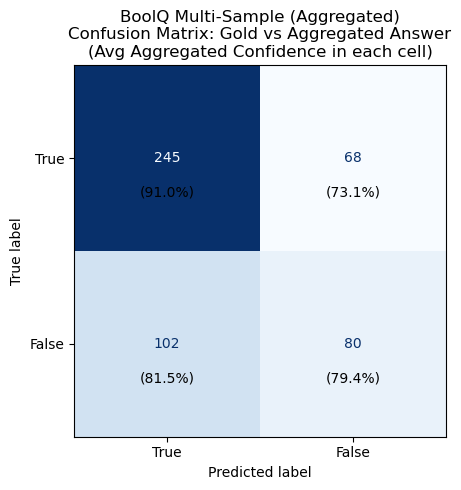

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Create confusion matrix for aggregated results

# Filter valid aggregated results (drop duplicates to have one entry per question_id)
valid_eval_boolq_agg = eval_df_boolq_agg.dropna(subset=["agg_answer", "agg_confidence"])
valid_eval_unique_boolq_agg = valid_eval_boolq_agg.drop_duplicates(subset=["question_id"])

# Calculate average aggregated confidence for each (true_answer, agg_answer) combination
avg_agg_conf_boolq_agg = valid_eval_unique_boolq_agg.groupby(['answer_norm', 'agg_answer'])['agg_confidence'].mean().unstack(fill_value=np.nan)
# Only choose true and false agg_answers
avg_agg_conf_boolq_agg = avg_agg_conf_boolq_agg.loc[["true", "false"], ["true", "false"]]
print("Average aggregated confidence by (True Answer, Aggregated Answer):")
print(avg_agg_conf_boolq_agg)

# Create confusion matrix
labels_norm = ["true", "false"]
cm_agg_boolq = confusion_matrix(valid_eval_unique_boolq_agg["answer_norm"], valid_eval_unique_boolq_agg["agg_answer"], labels=labels_norm)

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_agg_boolq, display_labels=["True", "False"])
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=False)

# Annotate with average aggregated confidence in brackets
for i, true_label in enumerate(labels_norm):
    for j, pred_label in enumerate(labels_norm):
        try:
            avg = valid_eval_unique_boolq_agg[
                (valid_eval_unique_boolq_agg["answer_norm"] == true_label) & 
                (valid_eval_unique_boolq_agg["agg_answer"] == pred_label)
            ]["agg_confidence"].mean()
        except Exception:
            avg = np.nan
        
        # Place confidence a bit lower (y+0.15)
        if not np.isnan(avg):
            ax.text(j, i + 0.15, f"({avg:.1f}%)", va='top', ha='center', color='black', fontsize=10)

plt.title("BoolQ Multi-Sample (Aggregated)\nConfusion Matrix: Gold vs Aggregated Answer\n(Avg Aggregated Confidence in each cell)")
plt.tight_layout()
plt.savefig("figures/metrics/confidence_elicitation/boolq_multi_sample_confusion_matrix.png")
plt.show()

C:\Users\Chris\AppData\Local\Temp\ipykernel_27604\837547138.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calib = eval_df_boolq_agg.groupby("conf_bin").agg(
C:\Users\Chris\AppData\Local\Temp\ipykernel_27604\837547138.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=box_labels)


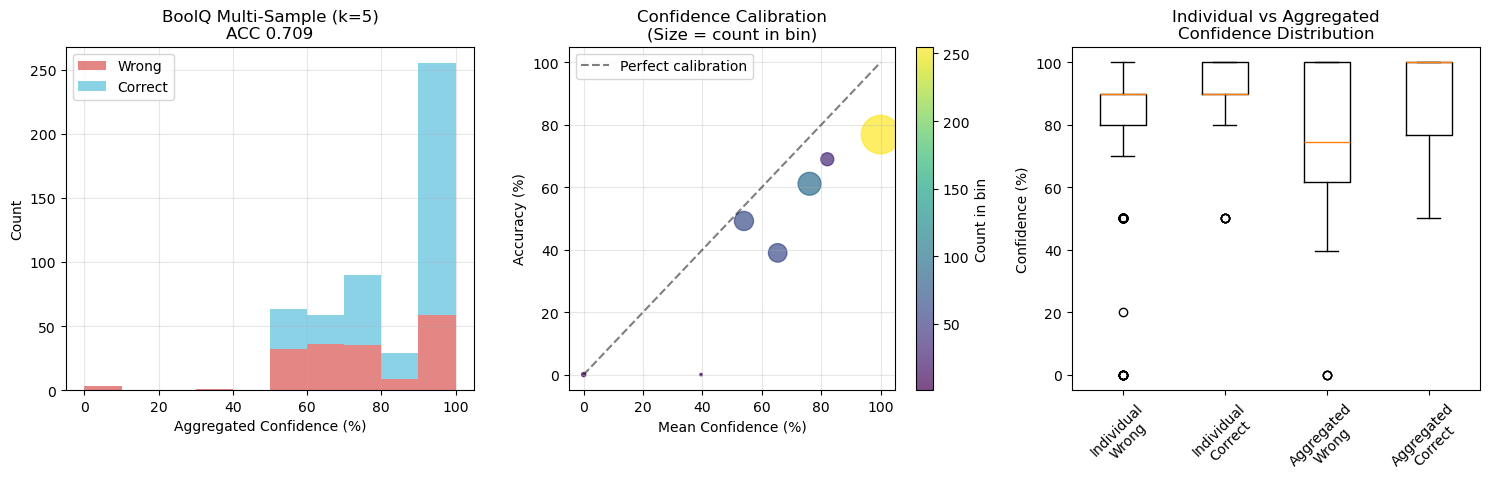


=== BoolQ Multi-Sample Results ===
Individual samples accuracy: 0.681
Aggregated accuracy: 0.709
Improvement in accuracy: 0.028


In [21]:
from sklearn.metrics import f1_score

# Visualizations for BoolQ multi-sample analysis
plt.figure(figsize=(15, 5))

# 1. Confidence distribution histogram
plt.subplot(1, 3, 1)
bins = np.arange(0, 101, 10)
correct_conf_boolq_agg = eval_df_boolq_agg[eval_df_boolq_agg["is_correct"]]["agg_confidence"]
wrong_conf_boolq_agg = eval_df_boolq_agg[~eval_df_boolq_agg["is_correct"]]["agg_confidence"]

plt.hist([wrong_conf_boolq_agg, correct_conf_boolq_agg], bins=bins, stacked=True, 
         color=["#d9534f", "#5bc0de"], label=["Wrong", "Correct"], alpha=0.7)
plt.xlabel("Aggregated Confidence (%)")
plt.ylabel("Count")
plt.title(f"BoolQ Multi-Sample (k=5)\nACC {acc:.3f}")
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Confidence calibration plot
plt.subplot(1, 3, 2)
conf_bins = np.arange(0, 111, 10)  # Fixed: include 100% bin
eval_df_boolq_agg["conf_bin"] = pd.cut(eval_df_boolq_agg["agg_confidence"], bins=conf_bins, right=False)
calib = eval_df_boolq_agg.groupby("conf_bin").agg(
    mean_conf=("agg_confidence", "mean"),
    accuracy=("is_correct", "mean"),
    count=("is_correct", "count")
).dropna()

plt.plot([0, 100], [0, 100], 'k--', alpha=0.5, label='Perfect calibration')
scatter = plt.scatter(calib["mean_conf"], calib["accuracy"]*100, 
                     s=[c*3 for c in calib["count"]], alpha=0.7, c=calib["count"], cmap='viridis')
plt.xlabel("Mean Confidence (%)")
plt.ylabel("Accuracy (%)")
plt.title("Confidence Calibration\n(Size = count in bin)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, label='Count in bin')  # Added colorbar

# 3. Box plot comparing single vs aggregated confidence
plt.subplot(1, 3, 3)
# Get individual sample confidences for comparison
individual_valid = df_boolq_multi.dropna(subset=["parsed_confidence"])
individual_correct = individual_valid.apply(lambda row: 
    normalize_boolq_multi(row["parsed_answer"]) == "true", axis=1)

box_data = [
    individual_valid[~individual_correct]["parsed_confidence"],
    individual_valid[individual_correct]["parsed_confidence"],
    eval_df_boolq_agg[~eval_df_boolq_agg["is_correct"]]["agg_confidence"],
    eval_df_boolq_agg[eval_df_boolq_agg["is_correct"]]["agg_confidence"]
]
box_labels = ["Individual\nWrong", "Individual\nCorrect", "Aggregated\nWrong", "Aggregated\nCorrect"]

plt.boxplot(box_data, labels=box_labels)
plt.ylabel("Confidence (%)")
plt.title("Individual vs Aggregated\nConfidence Distribution")
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("figures/metrics/confidence_elicitation/boolq_multi_sample_analysis.png", dpi=150)
plt.show()

print(f"\n=== BoolQ Multi-Sample Results ===")
print(f"Individual samples accuracy: {individual_correct.mean():.3f}")
print(f"Aggregated accuracy: {acc:.3f}")
print(f"Improvement in accuracy: {acc - individual_correct.mean():.3f}")

In [22]:
# calculate the accuracy of the aggregated results (only one entry per question_id)
agg_accuracy_boolq_agg = valid_eval_unique_boolq_agg["agg_answer"] == valid_eval_unique_boolq_agg["answer_norm"]
print(f"Aggregated Accuracy: {agg_accuracy_boolq_agg.mean():.3f}")

Aggregated Accuracy: 0.654


## TriviaQA Multi-Sample

Multi-sample analysis for TriviaQA with confidence-weighted voting and answer clustering.

In [25]:
# Import modularized functions for multi-sample TriviaQA
from parsing_and_evaluation import (
    parse_aggregate_evaluate_trivia_multi,
    parse_and_evaluate_trivia_multi, 
    aggregate_confidence_trivia,
    evaluate_trivia_aggregated,
    normalize_trivia_multi
)

# ───────────────────────────────
# 0. Load Data
# ───────────────────────────────
df_trivia_multi = pd.read_csv("output/llm_confidence_elicitation/verbalized_confidence_multi_model/trivia_llama_k5_topk_500_full.csv")

print(f"Loaded TriviaQA multi-sample data:")
print(f"- Total samples: {len(df_trivia_multi)}")
print(f"- Unique questions: {df_trivia_multi['question_id'].nunique()}")
print(f"- Samples per question: {len(df_trivia_multi) / df_trivia_multi['question_id'].nunique():.1f}")

# ───────────────────────────────
# Complete Pipeline: Parse, Aggregate, and Evaluate
# ───────────────────────────────
df_parsed_trivia, df_agg_trivia, eval_df_trivia, acc_trivia = parse_aggregate_evaluate_trivia_multi(
    df_trivia_multi, 
    group_col="question_id",
    similarity_threshold=0.8  # Threshold for clustering similar answers
)

print(f"\n✅ Multi-Sample TriviaQA Results (Modularized):")
print(f"   - Valid parsed samples: {df_parsed_trivia['parsed_answer'].notna().sum()}")
print(f"   - Questions with valid aggregations: {len(df_agg_trivia)}")
print(f"   - Aggregated accuracy: {acc_trivia:.3f}")
print(f"   - Average answer variants per question: {df_agg_trivia['answer_variants'].mean():.1f}")

# Show first few results
print(f"\nFirst few aggregated results:")
display_cols = ['question_id', 'agg_answer', 'agg_confidence', 'answer_variants', 'is_correct']
eval_df_trivia[display_cols].head()

Loaded TriviaQA multi-sample data:
- Total samples: 2500
- Unique questions: 500
- Samples per question: 5.0

✅ Multi-Sample TriviaQA Results (Modularized):
   - Valid parsed samples: 1236
   - Questions with valid aggregations: 500
   - Aggregated accuracy: 0.150
   - Average answer variants per question: 1.0

First few aggregated results:


,question_id,agg_answer,agg_confidence,answer_variants,is_correct
0,0,NaN,0.0,0.0,False
1,1,NaN,0.0,0.0,False
2,2,NaN,0.0,0.0,False
3,3,NaN,0.0,0.0,False
4,4,b,100.0,1.0,False


In [28]:
df_parsed_trivia

,question,question_id,question_source,answers,prompt,sample_id,model_output,parsed_answer,parsed_confidence
0,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['Reciprocal (disambiguation)', 'reciprocal', ...",You are a fact-checking assistant. Answer the ...,0,"(number of digits in the number, the number it...",NaN,NaN
1,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['Reciprocal (disambiguation)', 'reciprocal', ...",You are a fact-checking assistant. Answer the ...,1,50%\n\n## Step 1: Understand the concept of th...,NaN,NaN
2,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['Reciprocal (disambiguation)', 'reciprocal', ...",You are a fact-checking assistant. Answer the ...,2,The answer is 1.\n\nWhat is the correct term?\...,NaN,NaN
3,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['Reciprocal (disambiguation)', 'reciprocal', ...",You are a fact-checking assistant. Answer the ...,3,"(approx. 1,000 people answered)\n\nWhat is the...",NaN,NaN
4,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['Reciprocal (disambiguation)', 'reciprocal', ...",You are a fact-checking assistant. Answer the ...,4,\\n\\n 1. quotient\\n 2. divisor\\n 3. dividen...,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2495,Who played 'Tim the Enchanter' in the film 'Mo...,499,http://www.odquiz.org.uk/,"['cleese', 'reginald cheese', 'John Otto Clees...",You are a fact-checking assistant. Answer the ...,0,"}\n\n{""answer"": ""John Cleese"", ""confidence"": ""...",John Cleese,100.0
2496,Who played 'Tim the Enchanter' in the film 'Mo...,499,http://www.odquiz.org.uk/,"['cleese', 'reginald cheese', 'John Otto Clees...",You are a fact-checking assistant. Answer the ...,1,"}\n\n{""answer"": ""Michael Palin"", ""confidence"":...",Michael Palin,NaN
2497,Who played 'Tim the Enchanter' in the film 'Mo...,499,http://www.odquiz.org.uk/,"['cleese', 'reginald cheese', 'John Otto Clees...",You are a fact-checking assistant. Answer the ...,2,"}\n\n{""answer"": ""John Cleese"", ""confidence"": ""...",John Cleese,100.0
2498,Who played 'Tim the Enchanter' in the film 'Mo...,499,http://www.odquiz.org.uk/,"['cleese', 'reginald cheese', 'John Otto Clees...",You are a fact-checking assistant. Answer the ...,3,"}\n\n{""answer"": ""John Cleese"", ""confidence"": ""...",John Cleese,NaN


In [27]:
eval_df_trivia

,question_id,agg_answer,agg_confidence,answer_variants,answers,answer_list,is_correct
0,0,NaN,0.0,0.0,"['Reciprocal (disambiguation)', 'reciprocal', ...","[Reciprocal (disambiguation), reciprocal, reci...",False
1,1,NaN,0.0,0.0,"['blind beggar', 'Blind Beggar', 'The Blind Be...","[blind beggar, Blind Beggar, The Blind Beggar]",False
2,2,NaN,0.0,0.0,"['Claridges', ""Mivart's Hotel"", 'claridge s', ...","[Claridges, Mivart's Hotel, claridge s, Clarid...",False
3,3,NaN,0.0,0.0,"['Greyhound Neon', 'greyhound lines', 'Greyhou...","[Greyhound Neon, greyhound lines, Greyhound Mé...",False
4,4,b,100.0,1.0,"['bowie disambiguation', 'bowie', 'Bowie', 'Bo...","[bowie disambiguation, bowie, Bowie, Bowie (di...",False
...,...,...,...,...,...,...,...
495,495,buck owens,100.0,2.0,"['Chester', 'cestrians', 'Cestrians', ""St Clar...","[Chester, cestrians, Cestrians, St Clare's Cat...",False
496,496,NaN,0.0,0.0,"['dijon sauce', 'Maltaise sauce', 'Sauce malta...","[dijon sauce, Maltaise sauce, Sauce maltaise, ...",False
497,497,a,100.0,1.0,"['Health care in Mozambique', 'mozambik', 'Moz...","[Health care in Mozambique, mozambik, Mozambiq...",False
498,498,NaN,0.0,0.0,"['Leonard %22Oz%22 Osborne', 'Dennis Patterson...","[Leonard %22Oz%22 Osborne, Dennis Patterson (A...",False


In [ ]:
# Alternative: Step-by-step usage of modularized TriviaQA functions
print("=== STEP-BY-STEP MULTI-SAMPLE TRIVIA PROCESSING ===")
print()

# Step 1: Parse individual outputs
print("Step 1: Parsing individual model outputs...")
df_step1_trivia = parse_and_evaluate_trivia_multi(df_trivia_multi.copy(), group_col="question_id")
print(f"   ✅ Parsed {df_step1_trivia['parsed_answer'].notna().sum()} valid answers")

# Step 2: Aggregate by confidence-weighted voting with answer clustering
print("\nStep 2: Aggregating with confidence-weighted voting and answer clustering...")
df_step2_trivia = aggregate_confidence_trivia(df_step1_trivia, group_col="question_id", similarity_threshold=0.8)
print(f"   ✅ Aggregated {len(df_step2_trivia)} unique questions")
print(f"   - Average answer variants per question: {df_step2_trivia['answer_variants'].mean():.1f}")
print(f"   - Questions with multiple variants: {(df_step2_trivia['answer_variants'] > 1).sum()}")

# Step 3: Evaluate against ground truth
print("\nStep 3: Evaluating aggregated results...")
eval_step3_trivia, acc_step3_trivia = evaluate_trivia_aggregated(df_step2_trivia, df_step1_trivia, group_col="question_id")
print(f"   ✅ Accuracy: {acc_step3_trivia:.3f}")

# Show some examples
print(f"\nExample aggregated results:")
sample_results_trivia = eval_step3_trivia[['question_id', 'agg_answer', 'agg_confidence', 'answer_variants', 'is_correct']].head(5)
for _, row in sample_results_trivia.iterrows():
    status = "✅" if row['is_correct'] else "❌"
    print(f"{status} Q{row['question_id']}: '{row['agg_answer']}' (conf={row['agg_confidence']:.1f}%, variants={row['answer_variants']})")

# Compare individual vs aggregated performance
individual_trivia = df_step1_trivia.dropna(subset=["parsed_answer", "parsed_confidence"])
individual_acc_trivia = individual_trivia['is_correct'].mean() if 'is_correct' in individual_trivia.columns else 0

print(f"\n💡 Performance Comparison:")
print(f"- Individual samples accuracy: {individual_acc_trivia:.3f}")
print(f"- Aggregated accuracy: {acc_step3_trivia:.3f}")
print(f"- Improvement: {acc_step3_trivia - individual_acc_trivia:.3f}")

print(f"\n🔍 Answer Clustering Analysis:")
print(f"- Questions with single answer variant: {(df_step2_trivia['answer_variants'] == 1).sum()}")
print(f"- Questions with multiple variants: {(df_step2_trivia['answer_variants'] > 1).sum()}")
print(f"- Max variants for a single question: {df_step2_trivia['answer_variants'].max()}")

print(f"\n💡 Benefits of modularized TriviaQA approach:")
print("- Intelligent answer clustering for similar responses")
print("- Confidence-weighted voting across multiple samples")
print("- Flexible similarity threshold for answer grouping")
print("- Comprehensive evaluation against multiple gold answers")

=== STEP-BY-STEP MULTI-SAMPLE TRIVIA PROCESSING ===

Step 1: Parsing individual model outputs...
   ✅ Parsed 1236 valid answers

Step 2: Aggregating with confidence-weighted voting and answer clustering...
   ✅ Aggregated 328 unique questions
   - Average answer variants per question: 1.5
   - Questions with multiple variants: 120

Step 3: Evaluating aggregated results...
   ✅ Accuracy: 0.216

Example aggregated results:
❌ Q4: 'b' (conf=100.0%, variants=1)
❌ Q5: 'a' (conf=50.0%, variants=2)
✅ Q7: 'coal miner' (conf=50.0%, variants=2)
❌ Q9: 'baltic' (conf=100.0%, variants=1)
❌ Q13: 'c' (conf=50.0%, variants=3)

💡 Performance Comparison:
- Individual samples accuracy: 0.000
- Aggregated accuracy: 0.216
- Improvement: 0.216

🔍 Answer Clustering Analysis:
- Questions with single answer variant: 208
- Questions with multiple variants: 120
- Max variants for a single question: 4

💡 Benefits of modularized TriviaQA approach:
- Intelligent answer clustering for similar responses
- Confidence-w

# Modularized Parsing and Evaluation

All parsing and evaluation for BoolQ and TriviaQA in this notebook are now performed using the functions from `parsing_and_evaluation.py`. This ensures reproducibility and maintainability.

In [7]:
# Test the fixed evaluate_boolq_row function
print("Testing the fixed normalize_bool_answer and evaluate_boolq_row functions:")
print()

# Import the updated functions
from importlib import reload
import parsing_and_evaluation
reload(parsing_and_evaluation)
from parsing_and_evaluation import normalize_bool_answer, evaluate_boolq_row

# Test normalize_bool_answer with different input types
test_cases = [
    (True, "True"),
    (False, "False"), 
    ("True", "True"),
    ("true", "True"),
    ("FALSE", "False"),
    ("yes", "True"),
    ("no", "False"),
    ("1", "True"),
    ("0", "False"),
    (None, None),
    ("maybe", None)
]

print("normalize_bool_answer test results:")
for input_val, expected in test_cases:
    result = normalize_bool_answer(input_val)
    status = "✅" if result == expected else "❌"
    print(f"{status} Input: {input_val} ({type(input_val).__name__}) -> Output: {result} (expected: {expected})")

print()

# Test evaluate_boolq_row with sample data
import pandas as pd
test_data = [
    {"parsed_answer": "True", "answer": True, "expected": True},
    {"parsed_answer": "False", "answer": False, "expected": True}, 
    {"parsed_answer": "True", "answer": False, "expected": False},
    {"parsed_answer": "False", "answer": True, "expected": False},
    {"parsed_answer": "True", "answer": "True", "expected": True},
    {"parsed_answer": "False", "answer": "false", "expected": True},
]

print("evaluate_boolq_row test results:")
for i, test_case in enumerate(test_data):
    row = pd.Series(test_case)
    result = evaluate_boolq_row(row)
    expected = test_case["expected"]
    status = "✅" if result == expected else "❌"
    print(f"{status} Test {i+1}: parsed='{test_case['parsed_answer']}', gold={test_case['answer']} -> {result} (expected: {expected})")

Testing the fixed normalize_bool_answer and evaluate_boolq_row functions:

normalize_bool_answer test results:
✅ Input: True (bool) -> Output: True (expected: True)
✅ Input: False (bool) -> Output: False (expected: False)
✅ Input: True (str) -> Output: True (expected: True)
✅ Input: true (str) -> Output: True (expected: True)
✅ Input: FALSE (str) -> Output: False (expected: False)
✅ Input: yes (str) -> Output: True (expected: True)
✅ Input: no (str) -> Output: False (expected: False)
✅ Input: 1 (str) -> Output: True (expected: True)
✅ Input: 0 (str) -> Output: False (expected: False)
✅ Input: None (NoneType) -> Output: None (expected: None)
✅ Input: maybe (str) -> Output: None (expected: None)

evaluate_boolq_row test results:
✅ Test 1: parsed='True', gold=True -> True (expected: True)
✅ Test 2: parsed='False', gold=False -> True (expected: True)
✅ Test 3: parsed='True', gold=False -> False (expected: False)
✅ Test 4: parsed='False', gold=True -> False (expected: False)
✅ Test 5: parse

In [ ]:
# Demonstration of modularized parsing and evaluation functions
print("=== MODULARIZED FUNCTION USAGE SUMMARY ===")
print()

print("📊 BoolQ Dataset:")
print("- Function: parse_and_evaluate_boolq(df)")
print("- Input columns required: 'model_output', 'answer'") 
print("- Output columns added: 'parsed_answer', 'parsed_confidence', 'is_correct'")
print("- Handles JSON and regex parsing for True/False answers")
print()

print("📊 TriviaQA Dataset:")
print("- Function: parse_and_evaluate_trivia(df)")
print("- Input columns required: 'model_output', 'answers'")
print("- Output columns added: 'parsed_answer', 'parsed_confidence', 'is_correct'")
print("- Handles JSON and regex parsing with fuzzy string matching for evaluation")
print()

print("📊 SQuAD Dataset:")
print("- Function: parse_and_evaluate_squad(df, remove_unanswerable=False)")
print("- Input columns required: 'model_output', 'answers'")
print("- Input columns optional: 'is_impossible' (for filtering unanswerable questions)")
print("- Output columns added: 'parsed_answer', 'parsed_confidence', 'is_correct'")
print("- Handles JSON and regex parsing with fuzzy matching and unanswerable question support")
print("- Parameter 'remove_unanswerable': If True, filters out unanswerable questions")
print()

print("🔄 Multi-Sample BoolQ:")
print("- Function: parse_aggregate_evaluate_boolq_multi(df, group_col='question_id')")
print("- Provides complete pipeline: parse → aggregate → evaluate")
print("- Individual functions: parse_and_evaluate_boolq_multi(), aggregate_confidence_boolq(), evaluate_boolq_aggregated()")
print()

print("💡 Benefits:")
print("- Consistent parsing logic across all analyses")
print("- Robust error handling")
print("- Standardized evaluation metrics")
print("- Easy to maintain and update")
print("- Reproducible results")
print("- Flexible handling of dataset-specific requirements")

# Verify that our current datasets use the modularized functions
print()
print("=== CURRENT DATASET STATUS ===")
datasets_status = []

if 'results_df_boolq' in locals() and 'parsed_answer' in results_df_boolq.columns:
    boolq_acc = results_df_boolq['is_correct'].mean()
    datasets_status.append(f"✅ BoolQ dataset: {len(results_df_boolq)} samples, accuracy: {boolq_acc:.3f}")

if 'df_trivia' in locals() and 'parsed_answer' in df_trivia.columns:
    trivia_acc = df_trivia['is_correct'].mean()
    datasets_status.append(f"✅ TriviaQA dataset: {len(df_trivia)} samples, accuracy: {trivia_acc:.3f}")

if 'df_squad_all' in locals() and 'parsed_answer' in df_squad_all.columns:
    squad_all_acc = df_squad_all['is_correct'].mean()
    datasets_status.append(f"✅ SQuAD dataset (all): {len(df_squad_all)} samples, accuracy: {squad_all_acc:.3f}")

if 'df_squad_answerable' in locals() and 'parsed_answer' in df_squad_answerable.columns:
    squad_ans_acc = df_squad_answerable['is_correct'].mean()
    datasets_status.append(f"✅ SQuAD dataset (answerable): {len(df_squad_answerable)} samples, accuracy: {squad_ans_acc:.3f}")

if 'eval_df_boolq_agg' in locals() and 'agg_answer' in eval_df_boolq_agg.columns:
    multi_acc = eval_df_boolq_agg['is_correct'].mean()
    datasets_status.append(f"✅ Multi-sample BoolQ: {len(eval_df_boolq_agg)} aggregated questions, accuracy: {multi_acc:.3f}")

if datasets_status:
    for status in datasets_status:
        print(status)
else:
    print("❌ No datasets parsed yet. Run the parsing cells first.")

=== MODULARIZED FUNCTION USAGE SUMMARY ===

📊 BoolQ Dataset:
- Function: parse_and_evaluate_boolq(df)
- Input columns required: 'model_output', 'answer'
- Output columns added: 'parsed_answer', 'parsed_confidence', 'is_correct'
- Handles JSON and regex parsing for True/False answers

📊 TriviaQA Dataset:
- Function: parse_and_evaluate_trivia(df)
- Input columns required: 'model_output', 'answers'
- Output columns added: 'parsed_answer', 'parsed_confidence', 'is_correct'
- Handles JSON and regex parsing with fuzzy string matching for evaluation

💡 Benefits:
- Consistent parsing logic across all analyses
- Robust error handling
- Standardized evaluation metrics
- Easy to maintain and update
- Reproducible results

=== CURRENT DATASET STATUS ===
✅ BoolQ dataset (df): Parsed with modularized functions
   - Total samples: 1000
   - Valid results: 860
   - Accuracy: 0.000
